## This Jupyter Notebook serves as a demo Workflow of cleaning and exploring IgE measurements with Pax for an allergen panel involve testing blood samples to detect Immunoglobulin E (IgE) antibody levels against specific allergens using the Pax system.

Fill in the empty code cells below. Feel free to add more code cells if needed.

### Data upload:
- Use the upload button on the left to upload the file: 'PAX_Data.xlsx'
- By default the data should have been upload to into the folder '/content'

## Load the required modules
- Just run the following code-cell to load all modules needed for this exercise

In [1]:
import os
import pandas as pd
import numpy as np

### Checking the working directory:
- use 'os.getcwd()' method to check for the current working directory.
- If you are using Google Colab, the default working directory should be the folder 'content'
- If not, use the 'os. chdir(<path>)' method to make sure to set the working directory

In [2]:
os.getcwd()

'/content'

## Read the excel file
- if you are not using Google Colab, make sure to set the path to your data file correctly: \'<FILE-PATH\>/PAX_Data.xlsx'
- use: 'Sheet1' as sheet_name
- ignore the header: header=None
- assign the loaded data to a variable called: df


In [3]:
from google.colab import files

# Upload the file from your local system to Google Colab
uploaded = files.upload()



Saving PAX_Data.xlsx to PAX_Data (1).xlsx


In [5]:
import pandas as pd

# Define the path to your file. Since we're using Colab, it's '/content/PAX_Data.xlsx'
path = '/content/PAX_Data.xlsx'

# Read the Excel file
df = pd.read_excel(path, sheet_name='Sheet1', header=None)



### Print the 'shape' of the dataframe

In [31]:
# Print the first few rows of the dataframe
df.shape



(250, 6616)

### Print the number of rows:

In [32]:
# Print the number of rows
df.shape[0]



250

### Use the 'head' method to have a look at the first 10 rows of the table

In [9]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,Date of test,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,...,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30
1,Test number,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
2,Country,Spain,Netherland,Germany,Germany,Netherland,Sweden,Germany,Germany,UK,...,Slovenia,Poland,Belgium,Norway,Netherland,Slovenia,UK,Netherland,UK,Spain
3,Age Y/M,3Years 11Months,2Years 8Months,2Years 8Months,7Years 9Months,11Years 11Months,4Years 8Months,1Years 9Months,6Years 9Months,3Years 8Months,...,8Years 8Months,3Years 7Months,3Years 7Months,1Years 5Months,1Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months
4,Sex,Female,Male,Male,Female,Male,Female,Male,Female,Female,...,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male
5,Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
6,rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
7,Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
8,Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
9,rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96


### Splitting the Data:
- As you can see, row 0 to 4 contains the metadata of the experiment
- Row 5 to end contains the measured expression data of Allergens

Now, we need to split the data into:
- Metadata and
- Expression data

Check the documentation of the pandas method 'iloc'
- Split the data, row 0 to 4 and assing it to a variable called: md
- From row 5 to end, assing the expression data to a variable called: expr

In [26]:
# Split the data into metadata and expression data using iloc
md = df.iloc[0:5, :]
expr = df.iloc[5:, :]



### Print the 'shape' of each new table

In [29]:
# Verify the split by printing the shapes
md.shape


(5, 6616)

In [30]:
expr.shape

(245, 6616)

### Use the 'head' method to inspect the expr table


In [33]:
md.head(10)


,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,Date of test,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,...,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30
1,Test number,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
2,Country,Spain,Netherland,Germany,Germany,Netherland,Sweden,Germany,Germany,UK,...,Slovenia,Poland,Belgium,Norway,Netherland,Slovenia,UK,Netherland,UK,Spain
3,Age Y/M,3Years 11Months,2Years 8Months,2Years 8Months,7Years 9Months,11Years 11Months,4Years 8Months,1Years 9Months,6Years 9Months,3Years 8Months,...,8Years 8Months,3Years 7Months,3Years 7Months,1Years 5Months,1Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months
4,Sex,Female,Male,Male,Female,Male,Female,Male,Female,Female,...,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male


As you can see column 0 contains the name of the Allergens

- Set the Allergen names as the index of the table (similar to rownames in R)example:   'expr.index = ...'
- 'drop' the column 0 and override the current variable

In [34]:
expr.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
5,Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
6,rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
7,Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
8,Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
9,rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96
10,Pas n,21.17,22.28,21.03,21.77,20.55,19.32,30.85,23.31,20.62,...,21.95,22.21,19.55,21.57,18.23,19.71,21.6,20.64,18.91,18.46
11,rPhl p 1,21.77,22.96,21.61,21.55,20.79,22.83,24.76,26.11,21.89,...,21.16,21.13,22.19,20.32,23,20.39,20.86,20.56,20.19,19.3
12,rPhl p 2,19.92,19.45,21.01,19.59,20.08,16.71,20.64,21.75,19.86,...,20.09,18.35,19.01,19.72,19.71,18.6,17.59,19.58,19.38,18.01
13,rPhl p 5.0101,21.79,19.07,20.15,19.72,23.4,19.61,23.81,21.44,18.77,...,19.72,19.68,21.86,19.21,47.15,19.98,22.94,19.48,21.48,20.64
14,rPhl p 6,22.25,20.69,23.09,19.94,19.59,18.8,23.23,21.69,18.37,...,20.43,18.33,19.35,19.79,20.39,19.94,19.59,24.45,19.06,20.69


In [35]:
# Set the allergen names as the index of the expr df
expr.index = expr.iloc[:, 0]

# Drop the first column
expr = expr.drop(expr.columns[0], axis=1)




### Cleaning the Metadata
- Use 'head' to look into the metadata
Note that we want to use the rows as columns, therefore:
- Transpose the metadata
- Change the table: row 0 should be the column names

In [36]:
expr.head()

,1,2,3,4,5,6,7,8,9,10,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,,,,,,,,,,,,,,,,,,,,,
Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,17.64,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,22.32,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,19.35,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,22.08,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,22.06,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96


In [37]:


md = md.transpose()


In [38]:
md.head()

,0,1,2,3,4
0,Date of test,Test number,Country,Age Y/M,Sex
1,2023-04-13,2334000487D,Spain,3Years 11Months,Female
2,2023-04-13,2331000683D,Netherland,2Years 8Months,Male
3,2023-04-13,2331000884D,Germany,2Years 8Months,Male
4,2023-04-13,2331000880D,Germany,7Years 9Months,Female


In [39]:

# Set the first row as the new column names
md.columns = md.iloc[0]



- Make sure to remove the first row, which now has become the column names

In [40]:
# Remove the first row as it is now redundant
md = md.drop(md.index[0])




### Use 'head' to inspect your table and make sure it looks as below:

	Date of test Test number	Country	Age Y/M**

1	2023-04-13	2334000487D	Spain	3Years 11Months

2	2023-04-13	2331000683D	Netherland	2Years 8Months

3	2023-04-13	2331000884D	Germany	2Years 8Months

4	2023-04-13	2331000880D	Germany	7Years 9Months

5	2023-04-13	2331000851D	Netherland	11Years 11Months

In [43]:
# Verify the cleaned metadata
md.head()

,Date of test,Test number,Country,Age Y/M,Sex
1,2023-04-13,2334000487D,Spain,3Years 11Months,Female
2,2023-04-13,2331000683D,Netherland,2Years 8Months,Male
3,2023-04-13,2331000884D,Germany,2Years 8Months,Male
4,2023-04-13,2331000880D,Germany,7Years 9Months,Female
5,2023-04-13,2331000851D,Netherland,11Years 11Months,Male


### Rename the Metadata columns
- rename the columns 'Date of test' to 'Date', 'Test number' to 'TestID' and 'Age Y/M' to 'Age (M)'

In [44]:
# Rename the columns
md.rename(columns={
    'Date of test': 'Date',
    'Test number': 'TestID',
    'Age Y/M': 'Age (M)'
}, inplace=True)

# Verify the renamed columns
md.head()


,Date,TestID,Country,Age (M),Sex
1,2023-04-13,2334000487D,Spain,3Years 11Months,Female
2,2023-04-13,2331000683D,Netherland,2Years 8Months,Male
3,2023-04-13,2331000884D,Germany,2Years 8Months,Male
4,2023-04-13,2331000880D,Germany,7Years 9Months,Female
5,2023-04-13,2331000851D,Netherland,11Years 11Months,Male


### Convert the Age column
The function below converts a string into a number of total month e.g.:

"2Years 8Months" convert to 32.0

- use the below function to convert each 'string' from the Age column into a number (float)
- Hint: check the function '.apply(convert_to_month)' which works on a dataframe column

In [46]:
import re

def convert_to_months(duration_str):
        # Check for missing or empty entries
    if pd.isnull(duration_str) or duration_str.strip() == "":
        return None


    # Regular expression to find years and months in the input string
    year_pattern = re.compile(r"(\d+)\s*Years?")
    month_pattern = re.compile(r"(\d+)\s*Months?")

    # Search for years and months in the input string
    years_match = year_pattern.search(duration_str)
    months_match = month_pattern.search(duration_str)

    # Extract years and months from the matches
    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    # Convert years to months and add to months
    total_months = (years * 12) + months

    return int(total_months)


In [81]:
# convert md['Age (M)'] to number
# write your code here:

import re

# Function to convert age strings to total months
def convert_to_months(duration_str):
    # Check for missing or empty entries
    if pd.isnull(duration_str) or duration_str.strip() == "":
        return None

    # Regular expression to find years and months in the input string
    year_pattern = re.compile(r"(\d+)\s*Years?")
    month_pattern = re.compile(r"(\d+)\s*Months?")

    # Search for years and months in the input string
    years_match = year_pattern.search(duration_str)
    months_match = month_pattern.search(duration_str)

    # Extract years and months from the matches
    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    # Convert years to months and add to months
    total_months = (years * 12) + months

    return int(total_months)

# Convert 'Age (M)' column to total months using .apply()
md['Age (M)'] = md['Age (M)'].apply(convert_to_months)





AttributeError: 'float' object has no attribute 'strip'

Check the result with 'head'

In [50]:
# Verify the conversion
md.head()

,Date,TestID,Country,Age (M),Sex
1,2023-04-13,2334000487D,Spain,47.0,Female
2,2023-04-13,2331000683D,Netherland,32.0,Male
3,2023-04-13,2331000884D,Germany,32.0,Male
4,2023-04-13,2331000880D,Germany,93.0,Female
5,2023-04-13,2331000851D,Netherland,143.0,Male


### Rename the columns of expr
- use the Test Number from md['Test number'] as new column names for the expr data

In [52]:
# Extract 'TestID' column from metadata df as a list
new_column_names = md['TestID'].tolist()

# Assign new column names to 'expr' DataFrame
expr.columns = new_column_names



### Print the shapes of both tables
- check if the number of columns in expr matches the number of rows in md

### Dropping duplicates and keep='first'

In [53]:
# Print the shapes of both tables
expr.shape


(245, 6615)

In [55]:
md.shape



(6615, 5)

In [82]:
# Check if the number of columns in expr matches the number of rows in md
if expr.shape[1] == md.shape[0]:
    print("The number of columns in expr matches the number of rows in md.")
else:
    print("The number of columns in expr does not match the number of rows in md.")


The number of columns in expr does not match the number of rows in md.


In [57]:
# This function can be use to inspect if there a duplictes within a column
md['TestID'].duplicated()

,TestID
1,False
2,False
3,False
4,False
5,False
...,...
6611,False
6612,False
6613,True
6614,False


In [58]:
# remove duplicate values in TestID column
# Hint: check the function: 'drop_duplicates'
# Hint: use the parameter 'keep='first'' to keep the first occurance and remove following duplicates
# Remove duplicate values in the TestID column of the metadata (md) DataFrame
md = md.drop_duplicates(subset='TestID', keep='first')

md.head()


,Date,TestID,Country,Age (M),Sex
1,2023-04-13,2334000487D,Spain,47.0,Female
2,2023-04-13,2331000683D,Netherland,32.0,Male
3,2023-04-13,2331000884D,Germany,32.0,Male
4,2023-04-13,2331000880D,Germany,93.0,Female
5,2023-04-13,2331000851D,Netherland,143.0,Male


### Don't forget to drop the duplicates on the expression data as well:

In [59]:
# example:

# df = df.loc[:, ~df.columns.duplicated()]

# where df.columns.duplicated(): returns a boolean array of duplicates
# ~ negates the boolean values: True is False and False is True
# Remove corresponding duplicate columns from the expr DataFrame
# First get the unique TestIDs from the updated metadata
unique_test_ids = md['TestID']

# Filter the expr df to keep only the columns with TestIDs present in the updated metadata
expr = expr.loc[:, expr.columns.isin(unique_test_ids)]



### Print the shapes of both table and make sure the number of rows in md and the number of columns in expr are matching

In [60]:

md.shape



(5814, 5)

In [61]:
expr.shape

(245, 6615)

### Saving the DATA
After initial cleaning, let's save the data in its current form:
- save both tables as csv file in the current directory

In [62]:
# Save the cleaned metadata (md) df to a CSV file
md.to_csv('cleaned_metadata.csv', index=False)

# Save the cleaned expression data (expr) df to a CSV file
expr.to_csv('cleaned_expression_data.csv', index=True)




### Subsetting the data
- subset the metadata and expression data to county = 'Spain'

Hint: use the TestID on the filtered data to subset on the expression data

In [ ]:
md_spain = md.loc[md.Country == 'Spain', :]

testIdSpain = md.TestID[md.Country == 'Spain']

- Print the shapes to check the result

In [63]:
# Subset the metadata to only include rows where the country is 'Spain'
md_spain = md.loc[md['Country'] == 'Spain']

# Get the TestIDs of the filtered metadata for Spain
test_ids_spain = md_spain['TestID']

# Subset the expression data to include only columns that match the TestIDs for Spain
expr_spain = expr.loc[:, test_ids_spain]



In [64]:
md_spain.shape


(522, 5)

In [65]:
expr_spain.shape


(245, 629)

# Exploration of the expression data
To gain an initial understanding of the expression data, we need to filter out the noise. Currently, noise is defined as values below 30.

- Convert the expr dataframe into a numpy array
- Set values below 30 to 0.0

Remove rows were all values are 0
- use the 'sum' method (axsis = 1) to the the sums of each row
- use this rowsum values to subset the array

In [66]:
# Convert to numpy
expr_array = expr_spain.to_numpy()

In [67]:
# Set values below 30 to 0
# Hint:
# 'my_array < value' will return a boolean array which can be used
expr_array[expr_array < 30] = 0.0

In [68]:
# Calculate row sums

row_sums = expr_array.sum(axis=1)

# Filter rows where the sum is not 0
filtered_expr_array = expr_array[row_sums > 0, :]

In [84]:
# Convert the expression DataFrame to a NumPy array
# Since we removed rows, the new DataFrame will not have the same index as the original
filtered_expr_df = pd.DataFrame(filtered_expr_array,
                                index=expr_spain.index[row_sums > 0],
                                columns=expr_spain.columns)


In [79]:
filtered_expr_df.shape

(198, 629)

In [80]:
# Display the first few rows of the cleaned expression dat
filtered_expr_df.head()


,2334000487D,2334000505D,2334000505D,2334000499D,2334000473D,2334000501D,2334000501D,2334000506D,2334000506D,2334000528D,...,2334002211D,2334002210D,2334002209D,2334002208D,2334002208D,2334002191D,2334002204D,2334002203D,2334002235D,2334002236D
0,,,,,,,,,,,,,,,,,,,,,
Cyn d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rCyn d 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,33.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dac g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fes p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rLol p 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualize the Expression Data

The follwing code is provided. Just make sure you replace the names of the variables with your variable names.

In [76]:
import seaborn as sns
# import pandas as pd
from sklearn.cluster import KMeans  # Example clustering algorithm
from sklearn.preprocessing import StandardScaler

In [77]:
# Standardize data (optional)
scaler = StandardScaler()
scaled_exp = scaler.fit_transform(filtered_expr_array) # use the name of your array

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


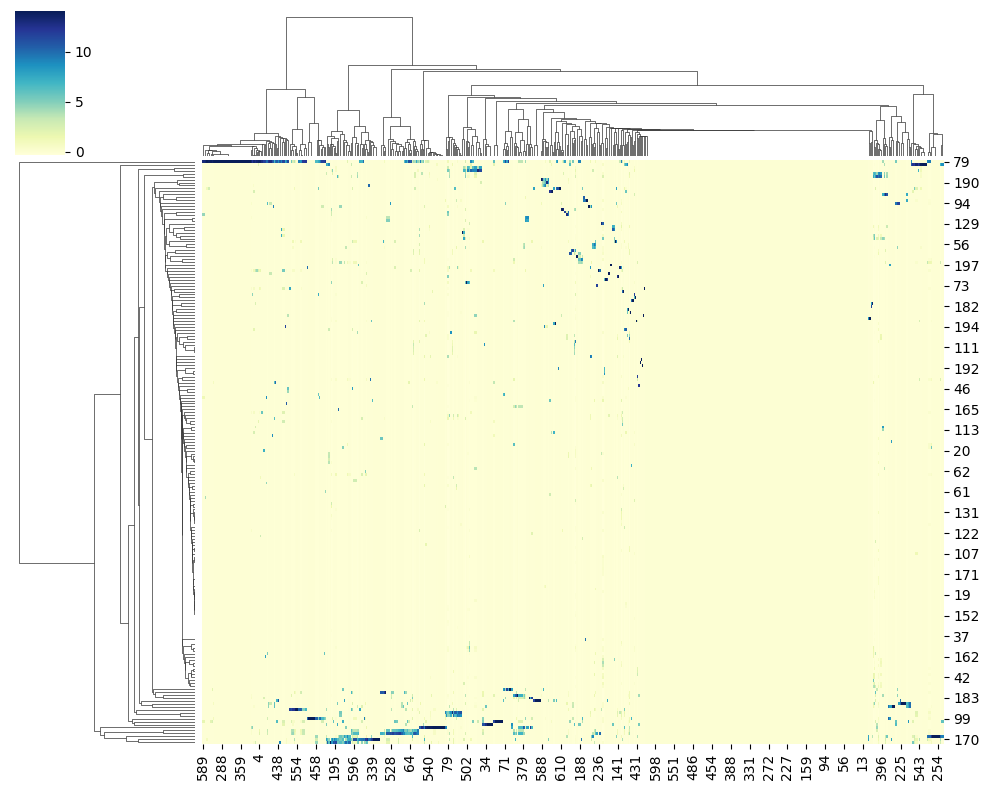

In [78]:
# Create the clustermap with hierarchical clustering
sns.clustermap(scaled_exp,
               method='ward',  # Linkage method (ward, single, complete, average, etc.)
               metric='euclidean',  # Distance metric (euclidean, cityblock, etc.)
               cmap="YlGnBu",       # Colormap
               figsize=(10, 8))    # Figure size



### Right click the plot and save the heatmap as image

# Done. Congratulations!